In [33]:
import pandas as pd

In [34]:
import matplotlib.pyplot as plt
import psycopg2
import getpass

In [35]:
%matplotlib inline
plt.style.use('ggplot') 

In [36]:
# Create a database connection
user = 'postgres'
password = 'master'
host = 'localhost'
dbname = 'mimic'
schema = 'mimiciii'

In [37]:
# Connect to the database
con = psycopg2.connect(dbname=dbname, user=user, host=host, 
                       password=password)
cur = con.cursor()
cur.execute('SET search_path to {}'.format(schema))

In [38]:
# Get length of stay from the icustays table
query = \
"""
select diagnosis, i.lab_time_count
from mimiciii.admissions a
inner join
    (select l.subject_id ,count(distinct(charttime)) as lab_time_count
    from mimiciii.labevents l
    group by l.subject_id) as i on 
i.subject_id=a.subject_id
order by i.lab_time_count desc
limit 50
"""

data = pd.read_sql_query(query,con)

In [39]:
# Display the first few rows of the data
data.head(150)

,diagnosis,lab_time_count
0,HYPERTENSIVE EMERGENCY,1892
1,MALIGNANT HYPERTENSION,1892
2,ABDOMINAL PAIN;TELEMETRY,1892
3,ABDOMINAL PAIN,1892
4,HTN URGENCY,1892
5,ST ELEVATED MYOCARDIAL INFARCTION,1892
6,HYPERTENSIVE URGENCY,1892
7,ABDOMINAL PAIN,1892
8,ABDOMINAL PAIN,1892
9,ABDOMINAL PAIN;TELEMETRY,1892


In [40]:
#diagnoses = data.plot.barh(y='lab_time_count', figsize=(5, 5), color='blue')

In [41]:
#plot = data.plot.pie(y='lab_time_count', figsize=(5, 5), legend=False, autopct='%1.1f%%')

In [42]:
data.groupby(['diagnosis'])['lab_time_count'].mean()

diagnosis
ABD. PAIN                                    1892
ABDOMINAL PAIN                               1892
ABDOMINAL PAIN;TELEMETRY                     1892
ACUTE CORONARY SYNDROME                      1892
BILATERAL ULCER LOWER EXTREMITY              1295
CONGESTIVE HEART FAILURE EXACERBATION        1295
DIABETIC KETOACIDOSIS                        1892
DIABETIC KETOACIDOSIS; HTN EMERGENCY         1892
FEVER                                        1892
GASTROPARESIS                                1892
GASTROPARESIS, HYPERTENTIVE URGENCY          1892
GASTROPARESIS,HYPERTENSION                   1892
HTN URGENCY                                  1892
HYPERTENSION                                 1892
HYPERTENSION;NAUSEA W\VOMITING               1892
HYPERTENSIVE EMERGENCY                       1892
HYPERTENSIVE URGENCY                         1892
HYPERTENSIVE URGENCY,NAUSEA,VOMITING         1892
HYPERTENSIVE URGENCY;GASTROPARESIS           1892
HYPERTENSIVE URGENCY;NAUSEA;VOMITING    

In [43]:
data.groupby(['diagnosis'])['lab_time_count'].quantile([.1, .25, .5, .75, .9])

diagnosis                                      
ABD. PAIN                                  0.10    1892.0
                                           0.25    1892.0
                                           0.50    1892.0
                                           0.75    1892.0
                                           0.90    1892.0
ABDOMINAL PAIN                             0.10    1892.0
                                           0.25    1892.0
                                           0.50    1892.0
                                           0.75    1892.0
                                           0.90    1892.0
ABDOMINAL PAIN;TELEMETRY                   0.10    1892.0
                                           0.25    1892.0
                                           0.50    1892.0
                                           0.75    1892.0
                                           0.90    1892.0
ACUTE CORONARY SYNDROME                    0.10    1892.0
                        

In [44]:
data.groupby(['diagnosis'])['lab_time_count'].median()

diagnosis
ABD. PAIN                                    1892
ABDOMINAL PAIN                               1892
ABDOMINAL PAIN;TELEMETRY                     1892
ACUTE CORONARY SYNDROME                      1892
BILATERAL ULCER LOWER EXTREMITY              1295
CONGESTIVE HEART FAILURE EXACERBATION        1295
DIABETIC KETOACIDOSIS                        1892
DIABETIC KETOACIDOSIS; HTN EMERGENCY         1892
FEVER                                        1892
GASTROPARESIS                                1892
GASTROPARESIS, HYPERTENTIVE URGENCY          1892
GASTROPARESIS,HYPERTENSION                   1892
HTN URGENCY                                  1892
HYPERTENSION                                 1892
HYPERTENSION;NAUSEA W\VOMITING               1892
HYPERTENSIVE EMERGENCY                       1892
HYPERTENSIVE URGENCY                         1892
HYPERTENSIVE URGENCY,NAUSEA,VOMITING         1892
HYPERTENSIVE URGENCY;GASTROPARESIS           1892
HYPERTENSIVE URGENCY;NAUSEA;VOMITING    

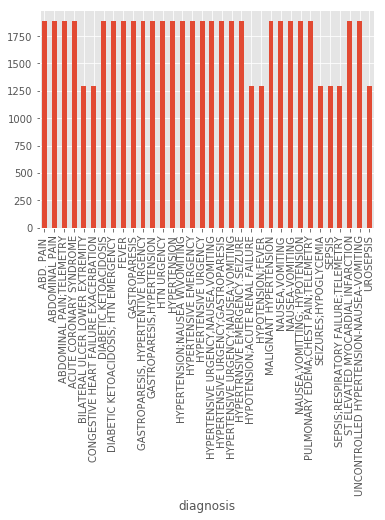

In [45]:
data = data.groupby(['diagnosis'])['lab_time_count'].mean()
data.plot.bar()